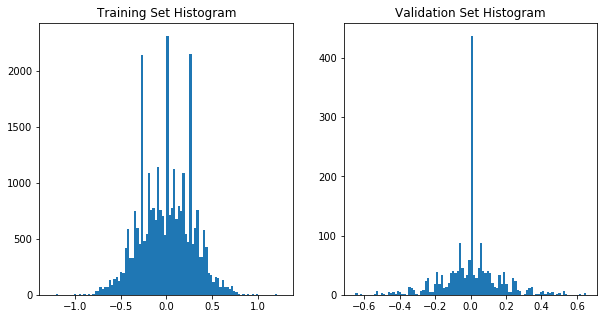

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2

from data import load_samples

# Visualizations will be shown in the notebook.
%matplotlib inline

samples_train = load_samples("data_train")
samples_val = load_samples("data_val", augment=False)


st_train = np.asarray(samples_train)[:,1].astype(float)
st_val = np.asarray(samples_val)[:,1].astype(float)

fig = plt.figure(figsize=(10,5))
a=fig.add_subplot(1,2,1)
a.hist(st_train, 100, normed=0)
a.set_title("Training Set Histogram")
a=fig.add_subplot(1,2,2)
a.hist(st_val, 100, normed=0)
a.set_title("Validation Set Histogram")

plt.show()

['data_train/IMG/left_2016_12_01_13_30_48_287.jpg', -0.11000000000000001, True, 15, True]
['data_train/IMG/center_2016_12_01_13_30_48_404.jpg', 0.0, False, 0, False]
['data_train/IMG/center_2016_12_01_13_30_48_404.jpg', -0.0, True, 0, False]
['data_train/IMG/left_2016_12_01_13_30_48_404.jpg', 0.26, False, 0, True]
['data_train/IMG/left_2016_12_01_13_30_48_404.jpg', -0.26, True, 0, False]
['data_train/IMG/right_2016_12_01_13_30_48_404.jpg', -0.26, False, 0, False]
['data_train/IMG/right_2016_12_01_13_30_48_404.jpg', 0.26, True, 0, False]
['data_train/IMG/center_2016_12_01_13_31_12_937.jpg', 0.36, True, 36, False]
['data_train/IMG/right_2016_12_01_13_31_13_037.jpg', 0.020000000000000018, True, -24, False]
['data_train/IMG/right_2016_12_01_13_31_13_177.jpg', -0.10999999999999999, True, -37, False]
['data_train/IMG/left_2016_12_01_13_31_13_279.jpg', 0.65, False, 39, False]
['data_train/IMG/left_2016_12_01_13_31_13_381.jpg', -0.12, False, -38, False]
['data_train/IMG/left_2016_12_01_13_31_1

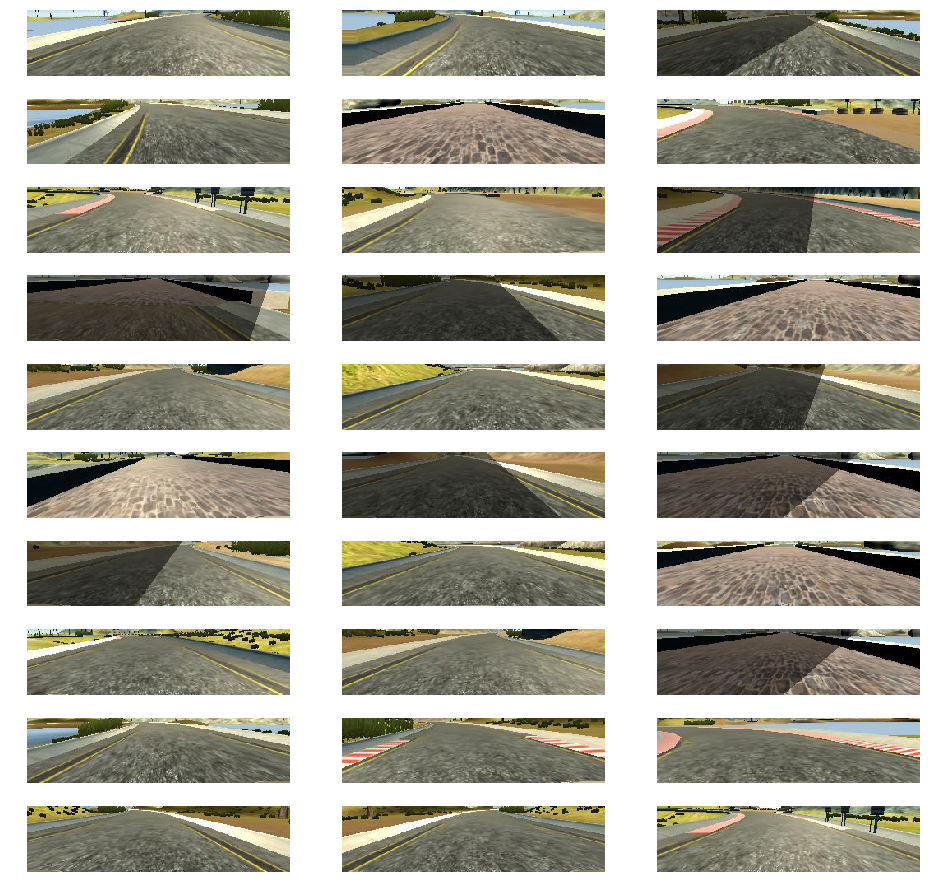

In [7]:
from model import generator

def plot_random_images(images, images2=None):
    fig, axes = plt.subplots(10,3, figsize=(16,16))
    
    for i , ax in enumerate(axes.flat):
        image = random.choice(images)
        y, x, c = image.shape
        ax.set_axis_off()
        imgplot = ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        
    plt.show()

for i in range(30):
    print(samples_train[i])
    
for X_batch, y_batch in generator(samples_train, 100, (80,320,3)):
    plot_random_images(X_batch)
    break

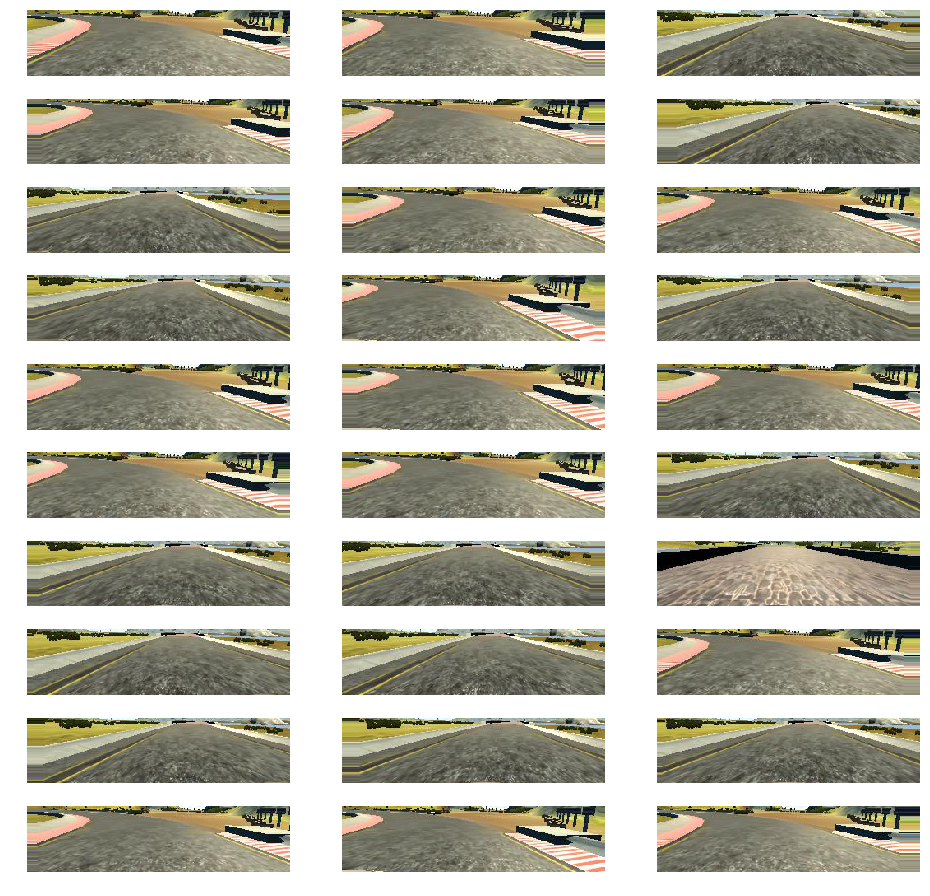

In [3]:
from data import translate_image, random_shadow
from model import preprocess_image

def plot_random_transformed_images(images):
    fig, axes = plt.subplots(10,3, figsize=(16,16))
    
    for i , ax in enumerate(axes.flat):
        image = random.choice(images)
        y, x, c = image.shape
        ax.set_axis_off()
        delta = np.random.randint(-25,25)
        ax.imshow(cv2.cvtColor(translate_image(image, delta), cv2.COLOR_BGR2RGB))        
    plt.show()

def generator_plain(samples, batch_size, input_shape):
    n_samples = len(samples)
    while 1: # Loop forever so the generator never terminates
        for offset in range(0, n_samples, batch_size):
            samples_batch = samples[offset:offset+batch_size]
            n_batch = len(samples_batch)
            y_batch = np.empty(n_batch, dtype=float)
            X_batch = np.empty([n_batch, input_shape[0], input_shape[1], input_shape[2]], dtype='uint8')
            for i, sample in enumerate(samples_batch):
                X_batch[i] = preprocess_image(cv2.imread(sample[0]), input_shape)
                y_batch[i] = sample[1]
            yield X_batch, y_batch

for X_batch, y_batch in generator_plain(samples_train, 100, (80,320,3)):
    plot_random_transformed_images(X_batch)
    break